![](./lesson_img/11.jpg)

![](./lesson_img/12.jpg)

## 9.1 下载CIFAR-10数据

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
# 加载数据
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()

In [3]:
# 查看数据
print(len(x_train_image))
print(len(x_test_image))

50000
10000


## 9.2 查看训练数据

![](./lesson_img/13.jpg)

![](./lesson_img/14.jpg)

In [4]:
print(x_train_image.shape)
print(x_test_image.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


![](./lesson_img/15.jpg)

In [5]:
# 查看第0项图片的内容，每一点都是RGB三个颜色组成的，RGB共有3个数字，范围0-255
x_test_image[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [7]:
y_test_label.shape

(10000, 1)

## 9.3 查看多项images与label

In [8]:
# 定义每个数字所代表的类别的名称
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [9]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, predictions, idx, num=10):
    """画出从idx位置开始，num个图像"""
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title = str(i)+', '+ label_dict[labels[i][0]]
        if len(predictions)>0:
            title += '=>'+label_dict[predictions[i]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

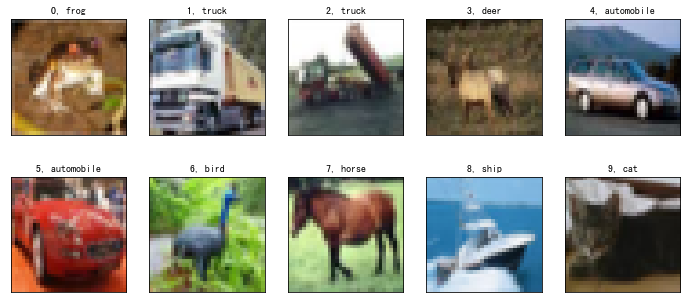

In [10]:
plot_images_labels_prediction(x_train_image, y_train_label, [], 0)

## 9.4 将image进行预处理

In [11]:
x_train_image.shape

(50000, 32, 32, 3)

In [12]:
# 查看训练数据第一个图像的第一个点
x_train_image[0][0][0]

array([59, 62, 63], dtype=uint8)

In [13]:
# 将照片image的数字图像标准化
x_train_img_normalize = x_train_image.astype('float32') / 255.0
x_test_img_normalize = x_test_image.astype('float32') / 255.0

In [15]:
# 查看标准化后的结果
x_train_img_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

## 9.5 对label进行预处理

In [16]:
# 查看label原理的形状
y_train_label.shape

(50000, 1)

In [17]:
# 查看前五项数据
y_train_label[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
# 进行One-Hot Encoding 编码（一位有效编码）
from keras.utils import np_utils
y_train_label_OneHot = np_utils.to_categorical(y_train_label)
y_test_label_OneHot = np_utils.to_categorical(y_test_label)

In [21]:
# 查看一位有效编码前后的形状
print(' y_train_label_OneHot.shape ', y_train_label_OneHot.shape)
print(' y_train_label:', y_train_label.shape)

 y_train_label_OneHot.shape  (50000, 10)
 y_train_label: (50000, 1)


In [22]:
y_train_label_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)